In [1]:
using CSV
using DataFrames
using Plots
using Statistics

In [2]:
function pointH(x::String1)
    if x == "H"
        return 3
    elseif x == "D"
        return 1
    else 
        return 0
    end
end

pointH (generic function with 1 method)

In [3]:
function pointA(x::String1)
    if x == "A"
        return 3
    elseif x == "D"
        return 1
    else 
        return 0
    end
end

pointA (generic function with 1 method)

In [4]:
function leaguetable(x::DataFrame)
    # select columns we will use
    LeagueSet = select(x, :Date, :HomeTeam, :AwayTeam, :FTR, :HTR, :FTHG, :FTAG)
    # group by home and away teams
    teamsH = groupby(LeagueSet, :HomeTeam)
    teamsA = groupby(LeagueSet, :AwayTeam)
    gfHome = combine(teamsH, :FTHG => sum)
    gfHome =rename(gfHome, :HomeTeam => :Team)
    gfAway =combine(teamsA, :FTAG => sum)
    gfAway =rename(gfAway, :AwayTeam => :Team)
    gfTotal = innerjoin(gfHome, gfAway; on=:Team)
    gfTotal = rename(gfTotal, :FTHG_sum => :HG, :FTAG_sum => :AG)
    gfTotal.TG = gfTotal.HG + gfTotal.AG
    gaHome = combine(teamsH, :FTAG => sum)
    gaHome =rename(gaHome, :HomeTeam => :Team);
    gaAway = combine(teamsA, :FTHG => sum)
    gaAway =rename(gaAway, :AwayTeam => :Team);
    gdHome = innerjoin(gfHome, gaHome; on=:Team)
    gdHome = rename(gdHome, :FTHG_sum => :GFH, :FTAG_sum => :GAH);
    gdHome.GDTH = gdHome.GFH - gdHome.GAH;
    gdAway = innerjoin(gfAway, gaAway; on=:Team)
    gdAway = rename(gdAway, :FTAG_sum => :GFA, :FTHG_sum => :GAA);
    gdAway.GDTA = gdAway.GFA - gdAway.GAA;
    gdTotal = innerjoin(gdHome, gdAway; on=:Team);
    gdTotal.GF = gdTotal.GFH + gdTotal.GFA;
    gdTotal.GA = gdTotal.GAH + gdTotal.GAA;
    gdTotal.GD = gdTotal.GDTH + gdTotal.GDTA;
    LeagueSet.pointsH = pointH.(LeagueSet.FTR);
    LeagueSet.pointsA = pointA.(LeagueSet.FTR);
    ptsHome = combine(teamsH, :pointsH => sum)
    ptsHome =rename(ptsHome, :HomeTeam => :Team)
    ptsAway = combine(teamsA, :pointsA => sum)
    ptsAway =rename(ptsAway, :AwayTeam => :Team)
    ptsTotal = innerjoin(ptsHome, ptsAway; on=:Team)
    ptsTotal = rename(ptsTotal, :pointsH_sum => :PointsH, :pointsA_sum => :PointsA);
    Table = innerjoin(gdTotal, ptsTotal; on=:Team);
    Table.Points = Table.PointsH + Table.PointsA;
    Table = select(Table, :Team, :GF, :GA, :GD, :Points, :PointsH, :PointsA, :GDTH, :GDTA,:GFH, :GFA)
    Table = sort(Table, :Points, rev=true);
    Table.Games .= (size(Table,1)-1)*2
    Table = select(Table, :Team, :Games, :GF, :GA, :GD, :Points, :PointsH, :PointsA, :GDTH, :GDTA, :GFH, :GFA)
    Table.HFAdvPts = (Table.PointsH - Table.PointsA)./Table.Games;
    Table.HFAdvGD = (Table.GDTH - Table.GDTA)./Table.Games 
    Table.HFAdvGF = (Table.GFH - Table.GFA)./Table.Games
    Table.TSPts = (Table.Points)./Table.Games
    Table.TSGD = (Table.GD)./Table.Games
    Table = Table = select(Table, :Team, :Games, :GF, :GA, :GD, :Points, :HFAdvPts, :HFAdvGD, :HFAdvGF, :TSGD, :TSPts)
    return Table
end

leaguetable (generic function with 1 method)

In [5]:
function medianLeagueHFAdvPts(n::DataFrame)
    LeagueSet = select(n, :Date, :HomeTeam, :AwayTeam, :FTR, :HTR, :FTHG, :FTAG)
    teamsH = groupby(LeagueSet, :HomeTeam)
    teamsA = groupby(LeagueSet, :AwayTeam)
    LeagueSet.pointsH = pointH.(LeagueSet.FTR);
    LeagueSet.pointsA = pointA.(LeagueSet.FTR);
    ptsHome = combine(teamsH, :pointsH => sum)
    ptsHome =rename(ptsHome, :HomeTeam => :Team)
    ptsAway = combine(teamsA, :pointsA => sum)
    ptsAway =rename(ptsAway, :AwayTeam => :Team)
    ptsTotal = innerjoin(ptsHome, ptsAway; on=:Team)
    ptsTotal = rename(ptsTotal, :pointsH_sum => :PointsH, :pointsA_sum => :PointsA);
    ptsTotal.Games .= (size(ptsTotal,1)-1)*2
    ptsTotal.HFAdvPts = (ptsTotal.PointsH - ptsTotal.PointsA)./ptsTotal.Games;
    return median(ptsTotal.HFAdvPts)
end

medianLeagueHFAdvPts (generic function with 1 method)

In [6]:
function medianLeagueHFAdvPts2(n::DataFrame)
    HFAdvPtsMedian = median(n.HFAdvPts)
    return HFAdvPtsMedian
end

medianLeagueHFAdvPts2 (generic function with 1 method)

In [7]:
function medianLeagueHFAdvGD(n::DataFrame)
    HFAdvGDMedian = median(n.HFAdvGD)
    return HFAdvGDMedian
end

medianLeagueHFAdvGD (generic function with 1 method)

In [8]:
function iqrLeagueHFAdvPts(n::DataFrame)
    HFAdvPtsIqr = iqr(n.HFAdvPts)
    return HFAdvPtsIqr
end

iqrLeagueHFAdvPts (generic function with 1 method)

In [9]:
function iqrLeagueHFAdvGD(n::DataFrame)
    HFAdvGDiqr = iqr(n.HFAdvGD)
    return HFAdvGDiqr
end

iqrLeagueHFAdvGD (generic function with 1 method)

In [10]:
function medianLeagueHFAdvGF(n::DataFrame)
    HFAdvGFMedian = median(n.HFAdvGF)
    return HFAdvGFMedian
end

medianLeagueHFAdvGF (generic function with 1 method)

In [11]:
function iqrLeagueHFAdvGF(n::DataFrame)
    HFAdvGFiqr = iqr(n.HFAdvGF)
    return HFAdvGFiqr
end

iqrLeagueHFAdvGF (generic function with 1 method)

In [12]:
function medianLeagueTSPts(n::DataFrame)
    TSPtsMedian = median(n.TSPts)
    return TSPtsMedian
end

medianLeagueTSPts (generic function with 1 method)

In [13]:
function iqrLeagueTSPts(n::DataFrame)
    TSPtsiqr = iqr(n.TSPts)
    return TSPtsiqr
end

iqrLeagueTSPts (generic function with 1 method)

In [14]:
function medianLeagueTSGD(n::DataFrame)
    TSGDMedian = median(n.TSGD)
    return TSGDMedian
end

medianLeagueTSGD (generic function with 1 method)

In [15]:
function iqrLeagueTSGD(n::DataFrame)
    TSGDiqr = iqr(n.TSGD)
    return TSGDiqr
end

iqrLeagueTSGD (generic function with 1 method)

In [16]:
CSV.read("Data/England/1/2023.csv", DataFrame);

In [17]:
Prem2023= CSV.read("Data/England/1/2023.csv", DataFrame);

In [18]:
Prem2022=CSV.read("Data/England/1/2022.csv", DataFrame);

In [19]:
Prem2021=CSV.read("Data/England/1/2021.csv", DataFrame);

In [20]:
Prem2020=CSV.read("Data/England/1/2020.csv", DataFrame);

In [21]:
Prem2019 = CSV.read("Data/England/1/2019.csv", DataFrame);

In [22]:
TablePrem2023 = leaguetable(Prem2023)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String15,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Man City,38,94,33,61,89,0.394737,0.657895,0.684211,1.60526,2.34211
2,Arsenal,38,88,43,45,84,0.157895,0.289474,0.473684,1.18421,2.21053
3,Man United,38,58,43,15,75,0.552632,0.973684,0.368421,0.394737,1.97368
4,Newcastle,38,68,33,35,71,0.184211,0.236842,0.105263,0.921053,1.86842
5,Liverpool,38,75,47,28,67,0.552632,0.789474,0.447368,0.736842,1.76316
6,Brighton,38,72,53,19,62,0.157895,0.342105,0.0526316,0.5,1.63158
7,Aston Villa,38,51,46,5,61,0.394737,0.5,0.394737,0.131579,1.60526
8,Tottenham,38,70,63,7,60,0.368421,0.447368,0.105263,0.184211,1.57895
9,Brentford,38,58,46,12,59,0.394737,0.578947,0.315789,0.315789,1.55263


In [23]:
TablePrem2022 = leaguetable(Prem2022)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String15,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Man City,38,99,26,73,93,0.0263158,0.342105,0.447368,1.92105,2.44737
2,Liverpool,38,94,26,68,92,0.157895,0.315789,0.105263,1.78947,2.42105
3,Chelsea,38,76,33,43,74,-0.157895,-0.342105,-0.0526316,1.13158,1.94737
4,Tottenham,38,69,40,29,71,0.236842,0.236842,0.184211,0.763158,1.86842
5,Arsenal,38,61,48,13,69,0.342105,0.605263,0.236842,0.342105,1.81579
6,Man United,38,57,57,0,58,0.315789,0.526316,0.184211,0.0,1.52632
7,West Ham,38,60,51,9,56,0.210526,0.131579,0.157895,0.236842,1.47368
8,Leicester,38,62,59,3,52,0.421053,0.5,0.157895,0.0789474,1.36842
9,Brighton,38,42,44,-2,51,-0.184211,-0.157895,-0.105263,-0.0526316,1.34211


In [24]:
TablePrem2021 = leaguetable(Prem2021)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String31,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Man City,38,83,32,51,86,-0.105263,0.0263158,0.0789474,1.34211,2.26316
2,Man United,38,73,44,29,74,-0.315789,-0.236842,0.0789474,0.763158,1.94737
3,Liverpool,38,68,42,26,69,-0.0789474,-0.210526,-0.263158,0.684211,1.81579
4,Chelsea,38,58,36,22,67,-0.0263158,0.105263,0.105263,0.578947,1.76316
5,Leicester,38,68,50,18,66,-0.263158,-0.263158,0.0,0.473684,1.73684
6,West Ham,38,62,47,15,65,0.0789474,0.131579,0.0526316,0.394737,1.71053
7,Tottenham,38,68,45,23,62,0.105263,0.184211,0.0526316,0.605263,1.63158
8,Arsenal,38,55,39,16,61,-0.131579,-0.263158,-0.184211,0.421053,1.60526
9,Leeds,38,62,54,8,59,-0.0263158,0.157895,-0.157895,0.210526,1.55263


In [25]:
TablePrem2020 = leaguetable(Prem2020)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String31,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Liverpool,38,85,33,52,99,0.289474,0.526316,0.5,1.36842,2.60526
2,Man City,38,102,35,67,81,0.342105,0.552632,0.315789,1.76316,2.13158
3,Chelsea,38,69,54,15,66,0.157895,0.342105,-0.236842,0.394737,1.73684
4,Man United,38,66,36,30,66,0.210526,0.421053,0.368421,0.789474,1.73684
5,Leicester,38,67,41,26,62,0.315789,0.263158,0.0789474,0.684211,1.63158
6,Wolves,38,51,40,11,59,0.0789474,0.131579,0.0789474,0.289474,1.55263
7,Tottenham,38,61,47,14,59,0.5,0.631579,0.289474,0.368421,1.55263
8,Arsenal,38,56,48,8,56,0.421053,0.421053,0.421053,0.210526,1.47368
9,Sheffield United,38,39,39,0,54,0.315789,0.473684,0.236842,0.0,1.42105


In [26]:
TablePrem2019 = leaguetable(Prem2019)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String15,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Man City,38,95,23,72,98,0.263158,0.473684,0.5,1.89474,2.57895
2,Liverpool,38,89,22,67,97,0.236842,0.605263,0.552632,1.76316,2.55263
3,Chelsea,38,63,39,24,72,0.315789,0.789474,0.394737,0.631579,1.89474
4,Tottenham,38,67,39,28,71,0.131579,0.210526,0.0263158,0.736842,1.86842
5,Arsenal,38,73,51,22,70,0.526316,0.789474,0.289474,0.578947,1.84211
6,Man United,38,65,54,11,66,0.157895,0.131579,0.0263158,0.289474,1.73684
7,Wolves,38,47,46,1,57,0.289474,0.342105,0.236842,0.0263158,1.5
8,Everton,38,54,46,8,54,0.368421,0.263158,0.157895,0.210526,1.42105
9,Leicester,38,51,48,3,52,0.0526316,0.131579,-0.0789474,0.0789474,1.36842


In [27]:
Bundes2023=CSV.read("Data/Germany/1/2023.csv", DataFrame);

In [28]:
TableBundes2023 = leaguetable(Bundes2023)

Row,Team,Games,GF,GA,GD,Points,HFAdvPts,HFAdvGD,HFAdvGF,TSGD,TSPts
,String15,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,Bayern Munich,34,92,38,54,71,0.147059,0.529412,0.411765,1.58824,2.08824
2,Dortmund,34,83,44,39,71,0.5,1.08824,0.794118,1.14706,2.08824
3,RB Leipzig,34,64,41,23,66,0.470588,0.5,0.352941,0.676471,1.94118
4,Union Berlin,34,51,38,13,62,0.470588,0.735294,0.264706,0.382353,1.82353
5,Freiburg,34,51,44,7,59,0.264706,0.676471,0.147059,0.205882,1.73529
6,Leverkusen,34,57,49,8,50,0.117647,0.470588,0.382353,0.235294,1.47059
7,Ein Frankfurt,34,58,52,6,50,0.411765,0.823529,0.352941,0.176471,1.47059
8,Wolfsburg,34,57,48,9,49,0.0294118,0.264706,0.323529,0.264706,1.44118
9,Mainz,34,54,55,-1,46,0.0588235,0.382353,0.235294,-0.0294118,1.35294


In [29]:
function LeagueHFAdv(x::DataFrame)
    y = leaguetable(x)
    HFAdv = select(y, :Team, :Points, :HFAdvPts, :HFAdvGD,:HFAdvGF)
    HFAdvPtsMean = mean(HFAdv[!, :HFAdvPts])
    HFAdvGDMean = mean(HFAdv[!, :HFAdvGD])
    HFAdvGFMean = mean(HFAdv[!, :HFAdvGF])
    HFAdvPtsVar = var(HFAdv[!, :HFAdvPts])
    HFAdvGDVar = var(HFAdv[!, :HFAdvGD])
    HFAdvGFVar = var(HFAdv[!, :HFAdvGF])
    return (table=HFAdv, HFAdvPtsMean, HFAdvGDMean, HFAdvGFMean, HFAdvPtsVar, HFAdvGDVar, HFAdvGFVar)
end

LeagueHFAdv (generic function with 1 method)

In [30]:
Prem2023Summary = LeagueHFAdv(Prem2023);

In [31]:
using StatsPlots

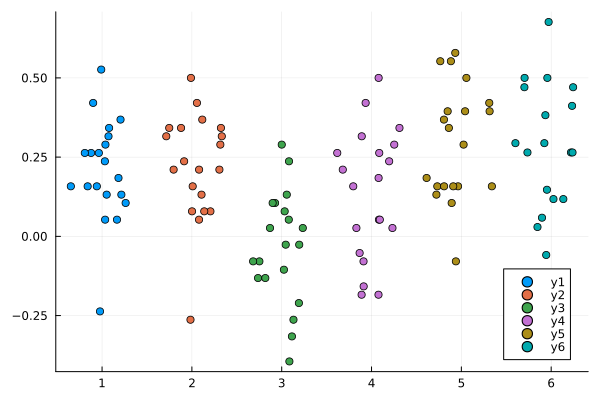

In [32]:
dotplot(TablePrem2019.HFAdvPts)
dotplot!(TablePrem2020.HFAdvPts)
dotplot!(TablePrem2021.HFAdvPts)
dotplot!(TablePrem2022.HFAdvPts)
dotplot!(TablePrem2023.HFAdvPts)
dotplot!(TableBundes2023.HFAdvPts)

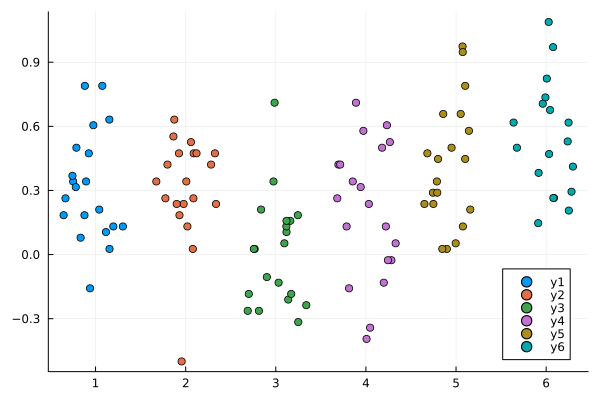

In [33]:
dotplot(TablePrem2019.HFAdvGD)
dotplot!(TablePrem2020.HFAdvGD)
dotplot!(TablePrem2021.HFAdvGD)
dotplot!(TablePrem2022.HFAdvGD)
dotplot!(TablePrem2023.HFAdvGD)
dotplot!(TableBundes2023.HFAdvGD)

In [34]:
Country = ["England", "France", "Germany", "Italy", "Spain"]

5-element Vector{String}:
 "England"
 "France"
 "Germany"
 "Italy"
 "Spain"

In [35]:
Division = ["1" "2" "3" "4"]

1×4 Matrix{String}:
 "1"  "2"  "3"  "4"

In [36]:
Year  = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011"]

1×13 Matrix{String}:
 "2023"  "2022"  "2021"  "2020"  "2019"  …  "2014"  "2013"  "2012"  "2011"

In [37]:
CountryDivision ="Data/" .* Country .* "/" .* Division

5×4 Matrix{String}:
 "Data/England/1"  "Data/England/2"  "Data/England/3"  "Data/England/4"
 "Data/France/1"   "Data/France/2"   "Data/France/3"   "Data/France/4"
 "Data/Germany/1"  "Data/Germany/2"  "Data/Germany/3"  "Data/Germany/4"
 "Data/Italy/1"    "Data/Italy/2"    "Data/Italy/3"    "Data/Italy/4"
 "Data/Spain/1"    "Data/Spain/2"    "Data/Spain/3"    "Data/Spain/4"

In [38]:
vec(CountryDivision)

20-element Vector{String}:
 "Data/England/1"
 "Data/France/1"
 "Data/Germany/1"
 "Data/Italy/1"
 "Data/Spain/1"
 "Data/England/2"
 "Data/France/2"
 "Data/Germany/2"
 "Data/Italy/2"
 "Data/Spain/2"
 "Data/England/3"
 "Data/France/3"
 "Data/Germany/3"
 "Data/Italy/3"
 "Data/Spain/3"
 "Data/England/4"
 "Data/France/4"
 "Data/Germany/4"
 "Data/Italy/4"
 "Data/Spain/4"

In [39]:
dontexist = [ "Data/France/3", "Data/Germany/3", "Data/Italy/3", "Data/Spain/3",  "Data/France/4", "Data/Germany/4"
,"Data/Italy/4", "Data/Spain/4"]

8-element Vector{String}:
 "Data/France/3"
 "Data/Germany/3"
 "Data/Italy/3"
 "Data/Spain/3"
 "Data/France/4"
 "Data/Germany/4"
 "Data/Italy/4"
 "Data/Spain/4"

In [40]:
CountryDivision = filter(x -> !(x in dontexist), CountryDivision)

12-element Vector{String}:
 "Data/England/1"
 "Data/France/1"
 "Data/Germany/1"
 "Data/Italy/1"
 "Data/Spain/1"
 "Data/England/2"
 "Data/France/2"
 "Data/Germany/2"
 "Data/Italy/2"
 "Data/Spain/2"
 "Data/England/3"
 "Data/England/4"

In [41]:
FileName = CountryDivision .* "/" .* Year .* ".csv"

12×13 Matrix{String}:
 "Data/England/1/2023.csv"  …  "Data/England/1/2011.csv"
 "Data/France/1/2023.csv"      "Data/France/1/2011.csv"
 "Data/Germany/1/2023.csv"     "Data/Germany/1/2011.csv"
 "Data/Italy/1/2023.csv"       "Data/Italy/1/2011.csv"
 "Data/Spain/1/2023.csv"       "Data/Spain/1/2011.csv"
 "Data/England/2/2023.csv"  …  "Data/England/2/2011.csv"
 "Data/France/2/2023.csv"      "Data/France/2/2011.csv"
 "Data/Germany/2/2023.csv"     "Data/Germany/2/2011.csv"
 "Data/Italy/2/2023.csv"       "Data/Italy/2/2011.csv"
 "Data/Spain/2/2023.csv"       "Data/Spain/2/2011.csv"
 "Data/England/3/2023.csv"  …  "Data/England/3/2011.csv"
 "Data/England/4/2023.csv"     "Data/England/4/2011.csv"

In [42]:
FileName = vec(FileName)

156-element Vector{String}:
 "Data/England/1/2023.csv"
 "Data/France/1/2023.csv"
 "Data/Germany/1/2023.csv"
 "Data/Italy/1/2023.csv"
 "Data/Spain/1/2023.csv"
 "Data/England/2/2023.csv"
 "Data/France/2/2023.csv"
 "Data/Germany/2/2023.csv"
 "Data/Italy/2/2023.csv"
 "Data/Spain/2/2023.csv"
 "Data/England/3/2023.csv"
 "Data/England/4/2023.csv"
 "Data/England/1/2022.csv"
 ⋮
 "Data/England/1/2011.csv"
 "Data/France/1/2011.csv"
 "Data/Germany/1/2011.csv"
 "Data/Italy/1/2011.csv"
 "Data/Spain/1/2011.csv"
 "Data/England/2/2011.csv"
 "Data/France/2/2011.csv"
 "Data/Germany/2/2011.csv"
 "Data/Italy/2/2011.csv"
 "Data/Spain/2/2011.csv"
 "Data/England/3/2011.csv"
 "Data/England/4/2011.csv"

In [43]:
Country = repeat(["England","France","Germany","Italy","Spain","England","France","Germany","Italy","Spain","England","England"], 13)

156-element Vector{String}:
 "England"
 "France"
 "Germany"
 "Italy"
 "Spain"
 "England"
 "France"
 "Germany"
 "Italy"
 "Spain"
 "England"
 "England"
 "England"
 ⋮
 "England"
 "France"
 "Germany"
 "Italy"
 "Spain"
 "England"
 "France"
 "Germany"
 "Italy"
 "Spain"
 "England"
 "England"

In [44]:
Division = repeat([1,1,1,1,1,2,2,2,2,2,3,4],13)

156-element Vector{Int64}:
 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 3
 4
 1
 ⋮
 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 3
 4

In [45]:
Year1 = repeat([2023],12)
Year2 = repeat([2022],12)
Year3 = repeat([2021],12)
Year4 = repeat([2020],12)
Year5 = repeat([2019],12)
Year6 = repeat([2018],12)
Year7 = repeat([2017],12)
Year8 = repeat([2016],12)
Year9 = repeat([2015],12)
Year10 = repeat([2014],12)
Year11 = repeat([2013],12)
Year12 = repeat([2012],12)
Year13 = repeat([2011],12)

12-element Vector{Int64}:
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011

In [46]:
Year = vcat(Year1,Year2,Year3,Year4,Year5,Year6,Year7,Year8,Year9,Year10,Year11,Year12,Year13)

156-element Vector{Int64}:
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2023
 2022
    ⋮
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011
 2011

In [47]:
fileList = DataFrame(Country=Country, Division=Division, Year=Year, FileName=FileName)

Row,Country,Division,Year,FileName
,String,Int64,Int64,String
1,England,1,2023,Data/England/1/2023.csv
2,France,1,2023,Data/France/1/2023.csv
3,Germany,1,2023,Data/Germany/1/2023.csv
4,Italy,1,2023,Data/Italy/1/2023.csv
5,Spain,1,2023,Data/Spain/1/2023.csv
6,England,2,2023,Data/England/2/2023.csv
7,France,2,2023,Data/France/2/2023.csv
8,Germany,2,2023,Data/Germany/2/2023.csv
9,Italy,2,2023,Data/Italy/2/2023.csv


In [51]:
masterTable = transform(fileList,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [52]:
masterTable.LeagueTable = leaguetable.(masterTable.df)

156-element Vector{DataFrame}:
 20×11 DataFrame
 Row │ Team            Games  GF     GA     GD     Points  HFAdvPts    HFAdvGD ⋯
     │ String15        Int64  Int64  Int64  Int64  Int64   Float64     Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Man City           38     94     33     61      89   0.394737   0.65789 ⋯
   2 │ Arsenal            38     88     43     45      84   0.157895   0.28947
   3 │ Man United         38     58     43     15      75   0.552632   0.97368
   4 │ Newcastle          38     68     33     35      71   0.184211   0.23684
   5 │ Liverpool          38     75     47     28      67   0.552632   0.78947 ⋯
   6 │ Brighton           38     72     53     19      62   0.157895   0.34210
   7 │ Aston Villa        38     51     46      5      61   0.394737   0.5
   8 │ Tottenham          38     70     63      7      60   0.368421   0.44736
   9 │ Brentford          38     58     46     12      59   0.394737   0.5789

In [53]:
filelist1 = subset(masterTable, :Country => ByRow(==("England")));

In [54]:
filelist2 = subset(masterTable, :Country => ByRow(==("France")));

In [55]:
filelist3 = subset(masterTable, :Country => ByRow(==("Italy")));

In [56]:
filelist4 = subset(masterTable, :Country => ByRow(==("Germany")));

In [57]:
filelist5 = subset(masterTable, :Country => ByRow(==("Spain")));

In [58]:
filelist5a = subset(filelist5, :Division => ByRow(==(2)));

In [59]:
filelist5aa = subset(filelist5a, :Year => ByRow(==(2013)));

In [60]:
filelist1.LeagueTable = leaguetable.(filelist1.df);

In [61]:
filelist2.LeagueTable = leaguetable.(filelist2.df);

In [62]:
filelist3.LeagueTable = leaguetable.(filelist3.df);

In [63]:
filelist4.LeagueTable = leaguetable.(filelist4.df);

In [64]:
filelist5.LeagueTable = leaguetable.(filelist5.df);

In [65]:
filelist5a.LeagueTable = leaguetable.(filelist5a.df);

In [66]:
filelist5aa.LeagueTable = leaguetable.(filelist5aa.df);

In [67]:
CSV.read("Data/Spain/2/2013.csv", DataFrame, ignoreemptyrows=true) |> (df->subset(df,:Date => (z->(!ismissing).(z))));

In [68]:
function readFileSkipMissing(filename::String)
    CSV.read(filename, DataFrame, ignoreemptyrows=true) |> (df->subset(df,:Date => (z->(!ismissing).(z))))
    
end

readFileSkipMissing (generic function with 1 method)

In [69]:
masterTable

Row,Country,Division,Year,FileName,df,LeagueTable
,String,Int64,Int64,String,DataFrame,DataFrame
1,England,1,2023,Data/England/1/2023.csv,380×106 DataFrame,20×11 DataFrame
2,France,1,2023,Data/France/1/2023.csv,380×105 DataFrame,20×11 DataFrame
3,Germany,1,2023,Data/Germany/1/2023.csv,306×105 DataFrame,18×11 DataFrame
4,Italy,1,2023,Data/Italy/1/2023.csv,380×105 DataFrame,20×11 DataFrame
5,Spain,1,2023,Data/Spain/1/2023.csv,380×105 DataFrame,20×11 DataFrame
6,England,2,2023,Data/England/2/2023.csv,552×106 DataFrame,24×11 DataFrame
7,France,2,2023,Data/France/2/2023.csv,379×105 DataFrame,20×11 DataFrame
8,Germany,2,2023,Data/Germany/2/2023.csv,306×105 DataFrame,18×11 DataFrame
9,Italy,2,2023,Data/Italy/2/2023.csv,380×105 DataFrame,20×11 DataFrame


In [70]:
?DataFrames.ismissing

```
ismissing(x)
```

Indicate whether `x` is [`missing`](@ref).

See also: [`skipmissing`](@ref), [`isnothing`](@ref), [`isnan`](@ref).


In [71]:
function iqr(data::Vector)
    sorted_data = sort(data)
    q1 = quantile(sorted_data, 0.25)
    q3 = quantile(sorted_data, 0.75)
    iqr = q3 - q1
    return iqr
end

iqr (generic function with 1 method)

In [72]:
iqr(TablePrem2023.HFAdvPts)

0.24342105263157893

In [73]:
median(TablePrem2023.HFAdvPts)

0.3157894736842105

In [74]:
medianLeagueHFAdvPts(Prem2023)

0.3157894736842105

In [75]:
masterTable.HFAdvPtsMedian = medianLeagueHFAdvPts2.(masterTable.LeagueTable);

In [76]:
names(masterTable)

7-element Vector{String}:
 "Country"
 "Division"
 "Year"
 "FileName"
 "df"
 "LeagueTable"
 "HFAdvPtsMedian"

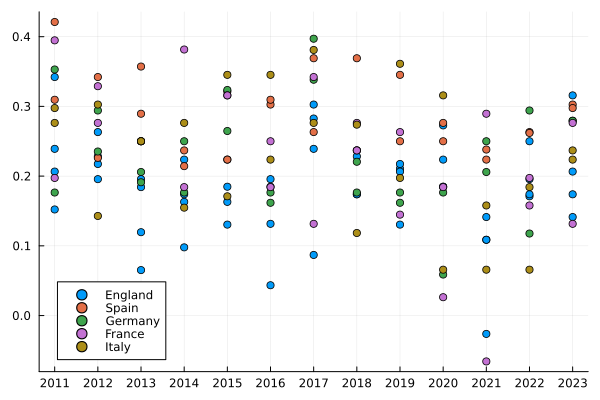

In [77]:
@df subset(masterTable,:Country => (c->c.=="England")) dotplot(:Year,:HFAdvPtsMedian,mode=:none, label="England")
@df subset(masterTable,:Country => (c->c.=="Spain")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none,label ="Spain")
@df subset(masterTable,:Country => (c->c.=="Germany")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="Germany")
@df subset(masterTable,:Country => (c->c.=="France")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="France")
@df subset(masterTable,:Country => (c->c.=="Italy")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="Italy")
xticks!(2011:2023)

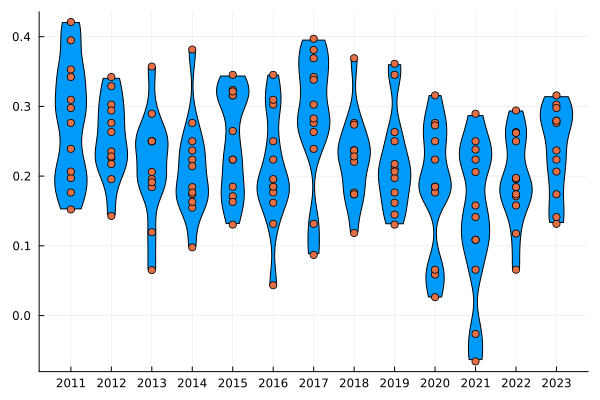

In [78]:
@df masterTable violin(:Year,:HFAdvPtsMedian,mode=:none, label="")
@df masterTable dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label="")

xticks!(2011:2023)

In [79]:
dotplot

dotplot (generic function with 1 method)

In [80]:
masterTable

Row,Country,Division,Year,FileName,df,LeagueTable,HFAdvPtsMedian
,String,Int64,Int64,String,DataFrame,DataFrame,Float64
1,England,1,2023,Data/England/1/2023.csv,380×106 DataFrame,20×11 DataFrame,0.315789
2,France,1,2023,Data/France/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.131579
3,Germany,1,2023,Data/Germany/1/2023.csv,306×105 DataFrame,18×11 DataFrame,0.279412
4,Italy,1,2023,Data/Italy/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.223684
5,Spain,1,2023,Data/Spain/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.302632
6,England,2,2023,Data/England/2/2023.csv,552×106 DataFrame,24×11 DataFrame,0.173913
7,France,2,2023,Data/France/2/2023.csv,379×105 DataFrame,20×11 DataFrame,0.276316
8,Germany,2,2023,Data/Germany/2/2023.csv,306×105 DataFrame,18×11 DataFrame,0.279412
9,Italy,2,2023,Data/Italy/2/2023.csv,380×105 DataFrame,20×11 DataFrame,0.236842


In [81]:
masterTable.HFAdvGDMedian = medianLeagueHFAdvGD.(masterTable.LeagueTable);

In [82]:
masterTable.HFAdvPtsIqr = iqrLeagueHFAdvPts.(masterTable.LeagueTable);

In [83]:
masterTable.HFAdvGDiqr = iqrLeagueHFAdvGD.(masterTable.LeagueTable);

In [84]:
masterTable.HFAdvGFMedian = medianLeagueHFAdvGF.(masterTable.LeagueTable);

In [85]:
masterTable.HFAdvGFiqr = iqrLeagueHFAdvGF.(masterTable.LeagueTable);

In [86]:
masterTable.TSPtsMedian = medianLeagueTSPts.(masterTable.LeagueTable);

In [87]:
masterTable.TSPtsiqr = iqrLeagueTSPts.(masterTable.LeagueTable);

In [88]:
masterTable.TSGDMedian = medianLeagueTSGD.(masterTable.LeagueTable);

In [89]:
masterTable.TSGDiqr = iqrLeagueTSGD.(masterTable.LeagueTable);

In [90]:
masterTable

Row,Country,Division,Year,FileName,df,LeagueTable,HFAdvPtsMedian,HFAdvGDMedian,HFAdvPtsIqr,HFAdvGDiqr,HFAdvGFMedian,HFAdvGFiqr,TSPtsMedian,TSPtsiqr,TSGDMedian,TSGDiqr
,String,Int64,Int64,String,DataFrame,DataFrame,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,England,1,2023,Data/England/1/2023.csv,380×106 DataFrame,20×11 DataFrame,0.315789,0.394737,0.243421,0.368421,0.144737,0.322368,1.27632,0.644737,-0.0921053,1.05263
2,France,1,2023,Data/France/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.131579,0.184211,0.25,0.309211,0.0789474,0.151316,1.39474,0.697368,-0.0131579,0.809211
3,Germany,1,2023,Data/Germany/1/2023.csv,306×105 DataFrame,18×11 DataFrame,0.279412,0.514706,0.330882,0.382353,0.294118,0.191176,1.30882,0.632353,-0.0588235,0.632353
4,Italy,1,2023,Data/Italy/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.223684,0.263158,0.276316,0.342105,0.118421,0.197368,1.38158,0.657895,0.0,0.861842
5,Spain,1,2023,Data/Spain/1/2023.csv,380×105 DataFrame,20×11 DataFrame,0.302632,0.394737,0.269737,0.217105,0.223684,0.151316,1.28947,0.5,-0.144737,0.526316
6,England,2,2023,Data/England/2/2023.csv,552×106 DataFrame,24×11 DataFrame,0.173913,0.25,0.315217,0.380435,0.0869565,0.233696,1.3587,0.36413,0.0,0.48913
7,France,2,2023,Data/France/2/2023.csv,379×105 DataFrame,20×11 DataFrame,0.276316,0.25,0.256579,0.328947,0.118421,0.243421,1.32895,0.309211,-0.0657895,0.513158
8,Germany,2,2023,Data/Germany/2/2023.csv,306×105 DataFrame,18×11 DataFrame,0.279412,0.308824,0.257353,0.441176,0.117647,0.169118,1.30882,0.522059,-0.0882353,0.933824
9,Italy,2,2023,Data/Italy/2/2023.csv,380×105 DataFrame,20×11 DataFrame,0.236842,0.184211,0.230263,0.256579,0.131579,0.0921053,1.25,0.427632,-0.0263158,0.473684


In [109]:
hfAdvTable = select(masterTable, :Country, :Division, :Year, :HFAdvPtsMedian,:HFAdvGDMedian,:HFAdvGFMedian,:HFAdvPtsIqr,:HFAdvGDiqr,:HFAdvGFiqr,:TSPtsMedian,:TSPtsiqr,:TSGDMedian,:TSGDiqr)

Row,Country,Division,Year,HFAdvPtsMedian,HFAdvGDMedian,HFAdvGFMedian,HFAdvPtsIqr,HFAdvGDiqr,HFAdvGFiqr,TSPtsMedian,TSPtsiqr,TSGDMedian,TSGDiqr
,String,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,England,1,2023,0.315789,0.394737,0.144737,0.243421,0.368421,0.322368,1.27632,0.644737,-0.0921053,1.05263
2,France,1,2023,0.131579,0.184211,0.0789474,0.25,0.309211,0.151316,1.39474,0.697368,-0.0131579,0.809211
3,Germany,1,2023,0.279412,0.514706,0.294118,0.330882,0.382353,0.191176,1.30882,0.632353,-0.0588235,0.632353
4,Italy,1,2023,0.223684,0.263158,0.118421,0.276316,0.342105,0.197368,1.38158,0.657895,0.0,0.861842
5,Spain,1,2023,0.302632,0.394737,0.223684,0.269737,0.217105,0.151316,1.28947,0.5,-0.144737,0.526316
6,England,2,2023,0.173913,0.25,0.0869565,0.315217,0.380435,0.233696,1.3587,0.36413,0.0,0.48913
7,France,2,2023,0.276316,0.25,0.118421,0.256579,0.328947,0.243421,1.32895,0.309211,-0.0657895,0.513158
8,Germany,2,2023,0.279412,0.308824,0.117647,0.257353,0.441176,0.169118,1.30882,0.522059,-0.0882353,0.933824
9,Italy,2,2023,0.236842,0.184211,0.131579,0.230263,0.256579,0.0921053,1.25,0.427632,-0.0263158,0.473684


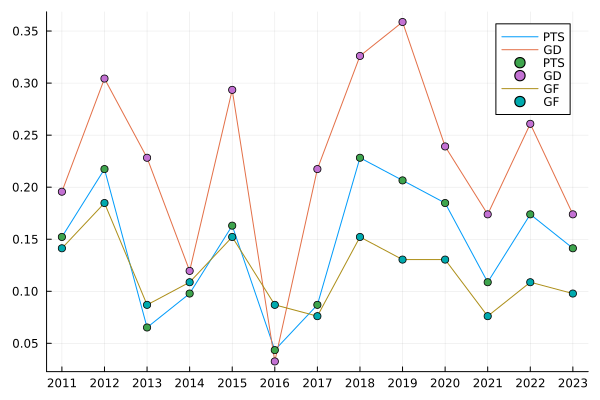

In [128]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot(:Year,:HFAdvPtsMedian,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot!(:Year,:HFAdvGDMedian,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvPtsMedian,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvGDMedian,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot!(:Year,:HFAdvGFMedian,mode=:none, label="GF")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvGFMedian,mode=:none, label="GF")

xticks!(2011:2023)

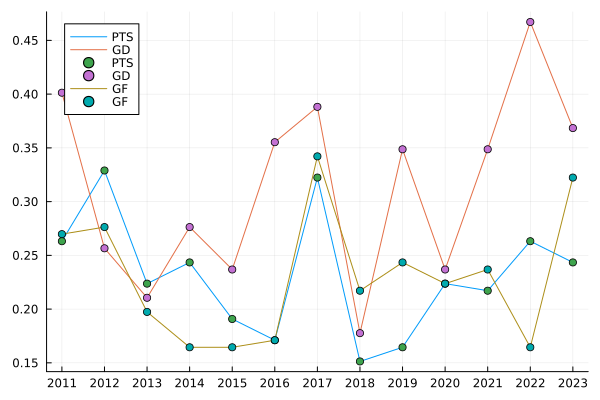

In [111]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:HFAdvPtsIqr,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot!(:Year,:HFAdvGDiqr,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvPtsIqr,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvGDiqr,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot!(:Year,:HFAdvGFiqr,mode=:none, label="GF")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvGFiqr,mode=:none, label="GF")

xticks!(2011:2023)

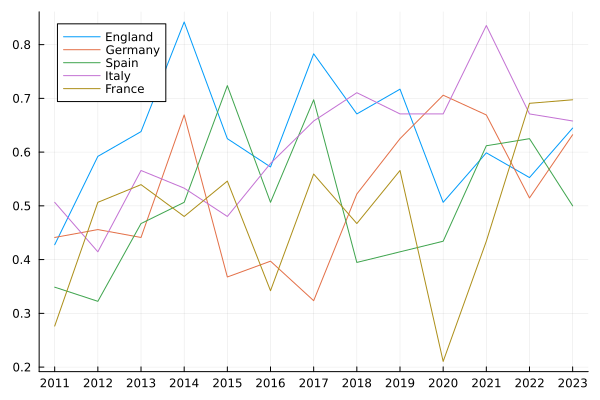

In [117]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:TSPtsiqr,mode=:none, label="England")
@df subset(hfAdvTable,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Germany")
@df subset(hfAdvTable,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Spain")
@df subset(hfAdvTable,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Italy")
@df subset(hfAdvTable,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="France")

xticks!(2011:2023)

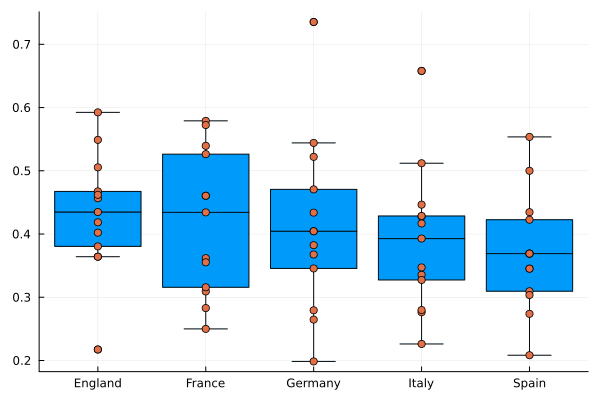

In [125]:
@df subset(hfAdvTable, :Division =>(d->d.==2)) boxplot(:Country,:TSPtsiqr,mode=:none,label="")
@df subset(hfAdvTable, :Division =>(d->d.==2)) dotplot!(:Country,:TSPtsiqr,mode=:none,label="")


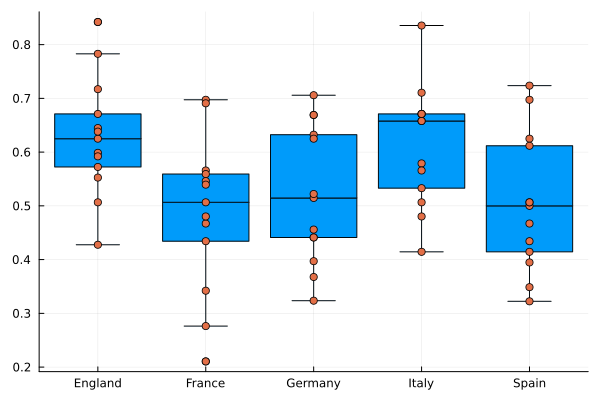

In [129]:
@df subset(hfAdvTable, :Division =>(d->d.==1)) boxplot(:Country,:TSPtsiqr,mode=:none,label="")
@df subset(hfAdvTable, :Division =>(d->d.==1)) dotplot!(:Country,:TSPtsiqr,mode=:none,label="")

In [133]:
nfl2022 = CSV.read("Data/NFL/nfl-2022.csv", DataFrame);

In [134]:
names(nfl2022)

14-element Vector{String}:
 "Week"
 "Day"
 "Date"
 "Time"
 "Winner/tie"
 "Column6"
 "Loser/tie"
 "Column8"
 "Pts"
 "Pts_1"
 "YdsW"
 "TOW"
 "YdsL"
 "TOL"

In [149]:
function hometeam(w,a,l)
    return ismissing(a) ? l : w
end
function awayteam(w,a,l)
    return ismissing(a) ? w : l
end

awayteam (generic function with 1 method)

In [147]:
transform!(nfl2022,[:("Winner/tie"),:("Column6"),:("Loser/tie")] => hometeam )

Row,Week,Day,Date,Time,Winner/tie,Column6,Loser/tie,Column8,Pts,Pts_1,YdsW,TOW,YdsL,TOL,Winner/tie_Column6_Loser/tie_hometeam
,String15?,String3?,String15,String7?,String31?,String1?,String31?,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String31?
1,1,Thu,2022-09-08,8:20PM,Buffalo Bills,@,Los Angeles Rams,boxscore,31,10,413,4,243,3,Buffalo Bills
2,1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27,26,385,1,416,2,New Orleans Saints
3,1,Sun,2022-09-11,1:00PM,Cleveland Browns,@,Carolina Panthers,boxscore,26,24,355,0,261,1,Cleveland Browns
4,1,Sun,2022-09-11,1:00PM,Chicago Bears,missing,San Francisco 49ers,boxscore,19,10,204,1,331,2,Chicago Bears
5,1,Sun,2022-09-11,1:00PM,Pittsburgh Steelers,@,Cincinnati Bengals,boxscore,23,20,267,0,432,5,Pittsburgh Steelers
6,1,Sun,2022-09-11,1:00PM,Houston Texans,missing,Indianapolis Colts,boxscore,20,20,299,1,517,2,Houston Texans
7,1,Sun,2022-09-11,1:00PM,Philadelphia Eagles,@,Detroit Lions,boxscore,38,35,455,0,386,1,Philadelphia Eagles
8,1,Sun,2022-09-11,1:00PM,Washington Commanders,missing,Jacksonville Jaguars,boxscore,28,22,390,3,383,1,Washington Commanders
9,1,Sun,2022-09-11,1:00PM,Miami Dolphins,missing,New England Patriots,boxscore,20,7,307,0,271,3,Miami Dolphins


In [150]:
transform!(nfl2022,[:("Winner/tie"),:("Column6"),:("Loser/tie")] => awayteam )

Row,Week,Day,Date,Time,Winner/tie,Column6,Loser/tie,Column8,Pts,Pts_1,YdsW,TOW,YdsL,TOL,Winner/tie_Column6_Loser/tie_awayteam
,String15?,String3?,String15,String7?,String31?,String1?,String31?,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String31?
1,1,Thu,2022-09-08,8:20PM,Buffalo Bills,@,Los Angeles Rams,boxscore,31,10,413,4,243,3,Los Angeles Rams
2,1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27,26,385,1,416,2,Atlanta Falcons
3,1,Sun,2022-09-11,1:00PM,Cleveland Browns,@,Carolina Panthers,boxscore,26,24,355,0,261,1,Carolina Panthers
4,1,Sun,2022-09-11,1:00PM,Chicago Bears,missing,San Francisco 49ers,boxscore,19,10,204,1,331,2,San Francisco 49ers
5,1,Sun,2022-09-11,1:00PM,Pittsburgh Steelers,@,Cincinnati Bengals,boxscore,23,20,267,0,432,5,Cincinnati Bengals
6,1,Sun,2022-09-11,1:00PM,Houston Texans,missing,Indianapolis Colts,boxscore,20,20,299,1,517,2,Indianapolis Colts
7,1,Sun,2022-09-11,1:00PM,Philadelphia Eagles,@,Detroit Lions,boxscore,38,35,455,0,386,1,Detroit Lions
8,1,Sun,2022-09-11,1:00PM,Washington Commanders,missing,Jacksonville Jaguars,boxscore,28,22,390,3,383,1,Jacksonville Jaguars
9,1,Sun,2022-09-11,1:00PM,Miami Dolphins,missing,New England Patriots,boxscore,20,7,307,0,271,3,New England Patriots


In [151]:
function hometeamwin(a)
    ismissing(a) ? "h" : "a"
end

hometeamwin (generic function with 1 method)

In [156]:
transform(nfl2022,:Column6 .=> hometeamwin => :htw) 

Row,Week,Day,Date,Time,Winner/tie,Column6,Loser/tie,Column8,Pts,Pts_1,YdsW,TOW,YdsL,TOL,Winner/tie_Column6_Loser/tie_awayteam,htw
,String15?,String3?,String15,String7?,String31?,String1?,String31?,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String31?,String
1,1,Thu,2022-09-08,8:20PM,Buffalo Bills,@,Los Angeles Rams,boxscore,31,10,413,4,243,3,Los Angeles Rams,a
2,1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27,26,385,1,416,2,Atlanta Falcons,a
3,1,Sun,2022-09-11,1:00PM,Cleveland Browns,@,Carolina Panthers,boxscore,26,24,355,0,261,1,Carolina Panthers,a
4,1,Sun,2022-09-11,1:00PM,Chicago Bears,missing,San Francisco 49ers,boxscore,19,10,204,1,331,2,San Francisco 49ers,a
5,1,Sun,2022-09-11,1:00PM,Pittsburgh Steelers,@,Cincinnati Bengals,boxscore,23,20,267,0,432,5,Cincinnati Bengals,a
6,1,Sun,2022-09-11,1:00PM,Houston Texans,missing,Indianapolis Colts,boxscore,20,20,299,1,517,2,Indianapolis Colts,a
7,1,Sun,2022-09-11,1:00PM,Philadelphia Eagles,@,Detroit Lions,boxscore,38,35,455,0,386,1,Detroit Lions,a
8,1,Sun,2022-09-11,1:00PM,Washington Commanders,missing,Jacksonville Jaguars,boxscore,28,22,390,3,383,1,Jacksonville Jaguars,a
9,1,Sun,2022-09-11,1:00PM,Miami Dolphins,missing,New England Patriots,boxscore,20,7,307,0,271,3,New England Patriots,a


In [157]:
ismissing(missing)

true

In [159]:
epl2022 = CSV.read("Data/England/1/2022.csv",DataFrame);

In [171]:
transform!(epl2022,:FTR => (x-> (x.=="H")) => :HTW)

Row,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,⋯
,String3,String15,Time,String15,String15,Int64,Int64,String1,Int64,Int64,String1,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64?,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64?,Float64?,⋯
1,E0,13/08/2021,20:00:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0,4.0,3.4,1.95,4.0,3.5,1.95,3.8,3.4,2.05,4.05,3.46,2.05,4.0,3.4,1.9,4.1,3.4,2.0,4.62,3.72,2.1,4.02,3.43,2.02,2.1,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.5,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.8,3.25,2.05,3.8,3.3,2.05,3.8,3.25,2.1,3.94,3.33,2.13,3.9,3.0,2.05,3.9,3.25,2.1,4.2,3.5,2.18,3.89,3.28,2.1,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.5,1.75,2.05,⋯
2,E0,14/08/2021,12:30:00,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0,1.53,4.5,5.75,1.53,4.5,5.75,1.55,4.4,5.75,1.56,4.57,5.96,1.52,4.33,5.8,1.55,4.4,6.0,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.3,1.67,2.32,1.71,2.38,1.65,2.29,-1.0,1.95,1.98,1.96,1.96,2.0,2.01,1.93,1.96,1.61,4.2,5.25,1.62,4.1,5.25,1.65,4.2,4.9,1.67,4.2,5.4,1.57,4.2,5.5,1.65,4.1,5.25,1.71,4.33,5.8,1.64,4.19,5.22,1.66,2.2,1.7,2.27,1.75,2.37,1.67,2.25,-1.0,2.05,1.75,⋯
3,E0,14/08/2021,15:00:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0,3.1,3.1,2.45,3.2,3.1,2.4,3.15,3.05,2.45,3.3,3.12,2.51,3.2,3.0,2.45,3.13,3.1,2.45,3.33,3.2,2.6,3.19,3.09,2.49,2.5,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.8,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.1,3.1,2.45,3.25,3.1,2.4,3.1,3.05,2.45,3.27,3.14,2.51,3.1,3.0,2.45,3.13,3.13,2.5,3.35,3.2,2.56,3.19,3.1,2.48,2.3,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,⋯
4,E0,14/08/2021,15:00:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0,1.25,5.75,13.0,1.28,5.75,10.5,1.25,6.0,13.0,1.26,6.24,12.74,1.25,5.5,13.0,1.25,5.75,13.0,1.3,6.3,15.0,1.26,5.92,12.8,1.8,2.0,1.8,2.09,1.84,2.12,1.79,2.06,-1.5,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.3,5.25,11.0,1.33,5.0,10.0,1.3,5.25,11.0,1.34,5.4,11.0,1.3,5.25,10.0,1.33,5.0,11.0,1.36,5.5,11.5,1.33,5.17,10.58,1.9,1.9,1.93,1.98,1.96,2.07,1.9,1.94,-1.5,2.05,1.75,⋯
5,E0,14/08/2021,15:00:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0,1.9,3.5,4.0,1.95,3.5,3.9,1.95,3.45,3.95,2.01,3.56,4.1,1.95,3.4,4.0,1.95,3.4,4.1,2.04,3.66,4.25,1.97,3.53,4.04,2.0,1.8,2.14,1.78,2.14,1.85,2.07,1.79,-0.5,2.0,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.0,3.4,3.9,2.05,3.4,3.75,2.0,3.35,4.0,2.05,3.45,4.07,1.95,3.4,3.9,2.0,3.3,4.2,2.12,3.5,4.2,2.04,3.39,3.95,2.2,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.5,2.05,1.88,⋯
6,E0,14/08/2021,15:00:00,Leicester,Wolves,1,0,H,1,0,H,C Pawson,9,17,5,3,6,10,5,4,1,2,0,0,1.66,3.8,5.25,1.67,3.9,5.25,1.7,3.75,5.25,1.73,3.79,5.47,1.7,3.6,5.25,1.7,3.7,5.25,1.75,3.96,5.6,1.71,3.75,5.32,2.09,1.84,2.08,1.84,2.12,1.85,2.04,1.81,-0.75,1.96,1.97,1.96,1.96,1.97,1.99,1.94,1.95,1.7,3.75,5.0,1.72,3.7,5.0,1.73,3.7,4.9,1.76,3.77,5.22,1.66,3.8,5.0,1.73,3.7,5.25,1.82,4.13,5.5,1.74,3.72,5.06,2.0,1.

In [172]:
names(epl2022)

108-element Vector{String}:
 "Div"
 "Date"
 "Time"
 "HomeTeam"
 "AwayTeam"
 "FTHG"
 "FTAG"
 "FTR"
 "HTHG"
 "HTAG"
 "HTR"
 "Referee"
 "HS"
 ⋮
 "AvgC<2.5"
 "AHCh"
 "B365CAHH"
 "B365CAHA"
 "PCAHH"
 "PCAHA"
 "MaxCAHH"
 "MaxCAHA"
 "AvgCAHH"
 "AvgCAHA"
 "FTR_function"
 "HTW"

In [173]:
using Pkg

In [174]:
Pkg.add("MixedModels")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed EnumX ──────────────── v1.0.4
   Installed ProgressMeter ──────── v1.7.2
   Installed MutableArithmetics ─── v1.3.0
   Installed MixedModels ────────── v4.14.1
   Installed FastGaussQuadrature ── v0.5.1
   Installed BSplineKit ─────────── v0.16.0
   Installed Arrow ──────────────── v2.6.2
   Installed GLM ────────────────── v1.8.3
   Installed Static ─────────────── v0.8.7
   Installed NLopt ──────────────── v0.6.5
   Installed BandedMatrices ─────── v0.17.28
   Installed CodecBzip2 ─────────── v0.7.2
   Installed MathProgBase ───────── v0.7.8
   Installed BenchmarkTools ─────── v1.3.2
   Installed LazyArrays ─────────── v1.1.1
   Installed Lz4_jll ────────────── v1.9.3+0
   Installed MathOptInterface ───── v1.17.1
   Installed ExprTools ──────────── v0.1.9
   Installed StatsModels ────────── v0.7.2
   Installed StructTypes ────────── v1.10.0
   Installed MatrixFactorizations ─ v1.

In [175]:
using MixedModels

In [177]:
out = fit(MixedModel,@formula(HTW~1+(1|HomeTeam)+(1|AwayTeam)),epl2022,Binomial())

|             |    Est. |     SE |     z |      p | σ_HomeTeam | σ_AwayTeam |
|:----------- | -------:| ------:| -----:| ------:| ----------:| ----------:|
| (Intercept) | -0.3572 | 0.2582 | -1.38 | 0.1666 |     0.7697 |     0.6995 |


In [178]:
out

|             |    Est. |     SE |     z |      p | σ_HomeTeam | σ_AwayTeam |
|:----------- | -------:| ------:| -----:| ------:| ----------:| ----------:|
| (Intercept) | -0.3572 | 0.2582 | -1.38 | 0.1666 |     0.7697 |     0.6995 |
